# Goal
The goal of this notebook is to demonstrate and visualize the multi-objective optimization process.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
from mlos.OptimizerEvaluationTools.ObjectiveFunctionFactory import ObjectiveFunctionFactory, objective_function_config_store
from mlos.Optimizers.BayesianOptimizerFactory import BayesianOptimizerFactory


objective_function_config = objective_function_config_store.get_config_by_name("2d_hypersphere_minimize_some")
objective_function = ObjectiveFunctionFactory.create_objective_function(objective_function_config=objective_function_config)

optimizer_factory = BayesianOptimizerFactory()
optimizer = optimizer_factory.create_local_optimizer(
    optimization_problem=objective_function.default_optimization_problem
)

In [ ]:
for _ in range(100):
    params = optimizer.suggest()
    objective_values = objective_function.evaluate_point(params)
    optimizer.register(params.to_dataframe(), objective_values.to_dataframe())

In [4]:
all_params_df, all_objectives_df, _ = optimizer.get_all_observations()
pareto_params_df, pareto_objectives_df, _ = optimizer.pareto_frontier()

11/24/2020 00:31:33 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizerFactory.py:  37 -    create_local_optimizer() ] Optimizer config not specified. Using default.
11/24/2020 00:31:33 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizerFactory.py:  37 -    create_local_optimizer() ] Optimizer config not specified. Using default.


Text(0.5, 0, 'y0')

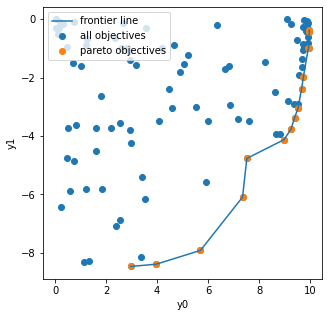

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(all_objectives_df['y0'], all_objectives_df['y1'], label="all objectives")
plt.scatter(pareto_objectives_df['y0'], pareto_objectives_df['y1'], label="pareto objectives")
plt.plot(pareto_objectives_df['y0'], pareto_objectives_df['y1'], label="frontier line")
plt.legend(loc="upper left")
plt.ylabel('y1')
plt.xlabel('y0')

Text(0.5, 0, 'y0')

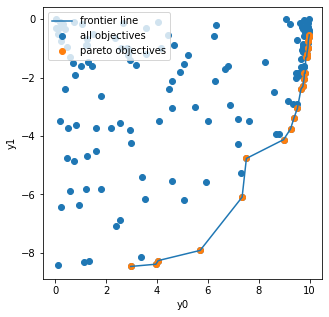

In [12]:
for _ in range(50):
    params = optimizer.suggest()
    objective_values = objective_function.evaluate_point(params)
    optimizer.register(params.to_dataframe(), objective_values.to_dataframe())

all_params_df, all_objectives_df, _ = optimizer.get_all_observations()
pareto_params_df, pareto_objectives_df, _ = optimizer.pareto_frontier()

plt.figure(figsize=(5, 5))
plt.scatter(all_objectives_df['y0'], all_objectives_df['y1'], label="all objectives")
plt.scatter(pareto_objectives_df['y0'], pareto_objectives_df['y1'], label="pareto objectives")
plt.plot(pareto_objectives_df['y0'], pareto_objectives_df['y1'], label="frontier line")
plt.legend(loc="upper left")
plt.ylabel('y1')
plt.xlabel('y0')